# 범주형 데이터 전처리
- 사이킷런은 문자열 값을 처리 하지 않기 때문에 input이나 output data가 문자열일 경우 숫자 형으로 변환해야 한다.
    - 보통은 정수로 변환

## 범주형 변수(Categorical Variable)
- 몇 개의 범주 중 하나에 속하는 값들로 구성된 변수. 어떤 분류에 대한 속성을 가지는 변수를 말한다.
    - 예) 성별 - 남/녀, 혈액형 - A, B, AB, O, 성적 - A,B,C,D,F
- 비서열(Unordered) 변수 
    - 범주에 속한 값간에 서열(순위)가 없는 변수
    - 성별, 혈액형
- 서열 (Ordered) 변수
    - 범주에 속한 값 간에 서열(순위)가 있는 변수
    - 성적, 직급
- 사이킷런은 문자열 값을 처리 하지 않기 때문에 input이나 output data가 문자열일 경우 숫자 형으로 변환해야 한다.
    - **범주형 변수의 경우** 전처리를 통해 정수값으로 변환한다.
    - 범주형이 아닌 **단순 문자열인** 경우 일반적으로 제거한다.

## 범주형 Feature의 처리
- Label Encoding
- One hot Encoding 

## 레이블 인코딩(Label encoding)


- 문자열(범주형) 값을 오름차순 정렬 후 0 부터 1씩 증가하는 값으로 변환
- **숫자의 차이가 모델에 영향을 주지 않는 트리 계열 모델(의사결정나무, 랜덤포레스트)에 적용한다.**
- **숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에는 사용하면 안된다.**

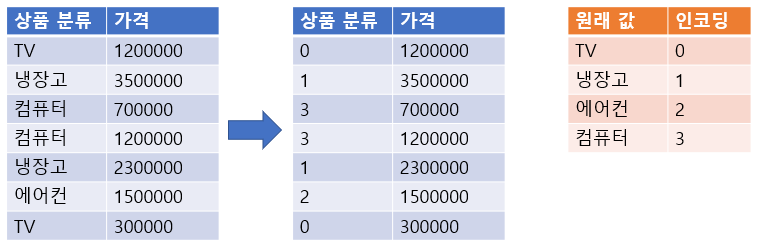

- **sklearn.preprocessing.LabelEncoder** 사용
    - fit(): 어떻게 변환할 지 학습
    - transform(): 문자열를 숫자로 변환(인코딩)
    - fit_transform(): 학습과 변환을 한번에 처리
    - inverse_transform():숫자를 문자열로 변환(디코딩)
    - classes_ : 인코딩한 클래스 조회

In [72]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

items = ['TV','냉장고','컴퓨터','컴퓨터','냉장고','에어컨','TV','에어컨']
# items : TV, 냉장고, 컴퓨터, 에어컨 4개의 class로 구성된 범주형 변수
# label encoding -> 범주형 변수 -> 정수형 변수(0,1,2,3)

In [4]:
le = LabelEncoder()
le.fit(items) # 어떻게 바꿀지 결정
item_labels = le.transform(items)  # 변경 처리

In [5]:
item_labels

array([0, 1, 3, 3, 1, 2, 0, 2])

In [6]:
items

['TV', '냉장고', '컴퓨터', '컴퓨터', '냉장고', '에어컨', 'TV', '에어컨']

In [7]:
# fit(), transform()에 전달한 feature가 같을 경우 fit_transform()
le = LabelEncoder()
item_labels2 = le.fit_transform(items)

In [8]:
item_labels2

array([0, 1, 3, 3, 1, 2, 0, 2], dtype=int64)

In [9]:
item_labels == item_labels2

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [10]:
# 결과값이 같은지 확인
np.all(item_labels == item_labels2)

True

In [11]:
items1 = ['TV','냉장고','컴퓨터','컴퓨터','냉장고','에어컨','TV','에어컨']
items2 = ['TV','냉장고','냉장고','컴퓨터']

In [12]:
le = LabelEncoder()
item1_labels = le.fit_transform(items1)
item2_labels = le.transform(items2)

In [13]:
item1_labels

array([0, 1, 3, 3, 1, 2, 0, 2], dtype=int64)

In [14]:
item2_labels

array([0, 1, 1, 3])

In [15]:
# class와 정수가 어떻게 매핑되었는지 확인
print(le.classes_)
# 1차원 배열 - 원소 : class, 정수:index

['TV' '냉장고' '에어컨' '컴퓨터']


In [16]:
# 인코딩된 정수 -> class값
le.inverse_transform(item2_labels)

array(['TV', '냉장고', '냉장고', '컴퓨터'], dtype='<U3')

In [17]:
le.inverse_transform(item_labels)

array(['TV', '냉장고', '컴퓨터', '컴퓨터', '냉장고', '에어컨', 'TV', '에어컨'], dtype='<U3')

In [18]:
items3 = ['TV','TV','핸드폰','건조기','건조기','선풍기']
# 핸드폰,건조기,선풍기가 없기때문에 에러남
# fit 할때 없던 class를 가진 feature 변환할 수 없다.
le.transform(items3)

ValueError: y contains previously unseen labels: '핸드폰'

### adult data 에 label encoding 적용
- 데이터셋은 1994년  인구조사 데이터 베이스에서 추출한 미국 성인의 소득 데이터셋이다.
- target 은 income 이며 수입이 $50,000 이하인지 초과인지로 분류되 있다.
- https://archive.ics.uci.edu/ml/datasets/adult

In [19]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

In [20]:
import pandas as pd
data = pd.read_csv('data/adult.data',
                   header=None,  # 첫번째 행이 데이터이기 때문에 heade=None(헤더없음)으로 설정
                   names=cols,
                   na_values='?',   # 결측치 지정
                   skipinitialspace=True   # 데이터 앞뒤 공백 제거
                  )
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
data.shape

(32561, 15)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [23]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [24]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

### 데이터 전처리 - 결측치 처리
- 결측치(Not Available- NA, nan, None) : 수집하지 못한값, 모르는 값
- 머신러닝 알고리즘은 Feature에 결측치가 있는 경우 처리를 하지 못한다.
- 결측치 처리
    1. 제거 (행, 열단위로 제거) : 일반적으로는 행기준으로 제거, 특정 열(컬럼)에 결측치가 많을 경우에는 열단위로 제거
    2. 다른값을 대체
        - 가장 가능성이 높은 값
            - 수치형 : 평균(정규분포), 중앙값
            - 범주형 : 최빈값(가장 많이 나온 값)
            - 결측치를 추론하는 머신러닝, 알고리즘을 사용
        - 결측치를 표현하는 값을 만들어서 대체
- 데이터양이 충분하면 제거하는 것이 우선, 데이터 양이 적은 경우 다른 값으로 대체 

In [25]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [26]:
# 원본은 안바뀌고 새로운 데이터프레임을 제공하므로 inplace=True 값으로 지정
data.dropna(axis=0, inplace=True)

In [27]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [28]:
data.shape

(30162, 15)

# TODO: encoding_columns 레이블 인코딩 처리
- 범주형: 'workclass','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender', 'hours-per-week','native-country', 'income'
- 연속형: 'age', fnlwgt', 'capital-gain', 'capital-loss'

encoding_columns 컬럼의 값들을 label encoding <br>
not_encoding_columns 컬럼의 값들은 그대로 유지

fit(데이터) : 데이터타입은 배열형태(리스트, 튜플, 1차원 numpy배열, series)

In [29]:
encoding_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country', 'income']
not_encoding_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']

In [30]:
data[encoding_columns].head(3)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K


In [31]:
data[not_encoding_columns].head(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40


In [32]:
type(data['workclass'])

pandas.core.series.Series

In [33]:
# le = LabelEncoder()
# le.fit(items) # 어떻게 바꿀지 결정
# item_labels = le.transform(items)  # 변경 처리

# for문 이용
adult_data = data.copy()

enc_dict = {}  # 빈 dictionary

l = LabelEncoder()
for col in encoding_columns:
    l.fit(adult_data[col])
    # adult_data[col] = l.transform(adult_data[col]) 가 맞다!!
    adult_labels = l.transform(adult_data[col])
    adult_data[col] = adult_labels
    print(np.unique(adult_labels))
    
    enc_dict[col] = l.classes_
    
adult_data.head()

[0 1 2 3 4 5 6]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[0 1 2 3 4 5 6]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[0 1 2 3 4 5]
[0 1 2 3 4]
[0 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
[0 1]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [34]:
print(enc_dict)

{'workclass': array(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay'], dtype=object), 'education': array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype=object), 'marital-status': array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype=object), 'occupation': array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty',
       'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
      dtype=object), 'relationship': array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife'], dtype=object), 'ra

#### DataFrame.apply()
- dataframe.apply(함수) -> 함수(series)
- series.apply(함수) -> 함수(원소)
- 일괄처리

In [35]:
enc_dict2 = {}  # 각 범주형 컬럼을 처리한 LabelEncoder객체를 저장

def label_encode(column):
    le = LabelEncoder()
    encoded_values = le.fit_transform(column)
    enc_dict2[column.name] = le  # column : Series  series.name : 컬럼명
    return encoded_values

In [36]:
# 데이터셋을 변경할 때 for문 보다 apply가 더 좋다!! 속도도 더 빠르고 함수형태로 쓰기때문에 더 편함!!

enc_df = data[encoding_columns].apply(label_encode)
enc_df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,5,9,4,0,1,4,1,38,0
1,4,9,2,3,0,4,1,38,0
2,2,11,0,5,1,4,1,38,0
3,2,1,2,5,0,2,1,38,0
4,2,9,2,9,5,2,0,4,0


In [37]:
data['workclass'].name

'workclass'

In [38]:
enc_dict2['workclass'].inverse_transform([1,2,3,4])

array(['Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc'],
      dtype=object)

In [39]:
data[not_encoding_columns]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [40]:
adult_data2 = enc_df.join(data[not_encoding_columns])
adult_data2

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,5,9,4,0,1,4,1,38,0,39,77516,13,2174,0,40
1,4,9,2,3,0,4,1,38,0,50,83311,13,0,0,13
2,2,11,0,5,1,4,1,38,0,38,215646,9,0,0,40
3,2,1,2,5,0,2,1,38,0,53,234721,7,0,0,40
4,2,9,2,9,5,2,0,4,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,2,7,2,12,5,4,0,38,0,27,257302,12,0,0,38
32557,2,11,2,6,0,4,1,38,1,40,154374,9,0,0,40
32558,2,11,6,0,4,4,0,38,0,58,151910,9,0,0,40
32559,2,11,4,0,3,4,1,38,0,22,201490,9,0,0,20


## adult data income 분류 모델링

In [41]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


## 데이터 분할
- X, y 나누기
- train/validation/test set 나누기

In [42]:
adult_data.shape

(30162, 15)

In [43]:
# X, y 나누기

y = adult_data['income']
# type(y)
X = adult_data.drop(columns='income')   # drop은 원본을 수정하지는 않음!!
print(X.shape, y.shape)
X.columns

(30162, 14) (30162,)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [44]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [45]:
y.value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [46]:
# train, validation, test set 분리 - hold out 방식

In [47]:
from sklearn.model_selection import train_test_split


# train, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24129, 14) (6033, 14) (24129,) (6033,)


In [48]:
# train, validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=0)   # test_size = 0.25 (기본)
print(y_train.shape, y_test.shape, y_val.shape)

(18096,) (6033,) (6033,)


In [49]:
y_train.shape,y_test.shape,y_val.shape

((18096,), (6033,), (6033,))

### 모델생성(DecisionTreeClassifier), 학습

In [117]:
from sklearn.tree import DecisionTreeClassifier

# 모델생성
tree = DecisionTreeClassifier(random_state=0, max_depth=7) 

# 학습
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

**max_depth** 
> 값을 설정해주지 않으면 질문의 깊이가 끝이 날때 까지 계속 깊어짐!!<br>
> 값을 설정해줌으로서 질문을 중간에 끊는다!<br>
> 질문을 중간에 끊으므로 train의 정확도는 낮아지고 val의 정확도는 높아짐(이상치의 학습결과질문이 끝까지 가지 않으므로)!!<br>
> train의 정확도는 중요하지 않고 val의 정확도가 중요함!<br>
> train/val 정확도가 비슷할수록 overfitting이 일어나지 않았다는 것! 이 값으로 test를 진행!<br>
> 노가다작업... 일일히 작업해서 찾아봐야한다

underfitting -> train/val 정확도가 모두 낮아서 원하던 결과치에 다다르지 못할경우 <br>

1. max_depth x : train : 0.99994, val: 0.79827
2. max_depth=1 : train : 0.75110, val: 0.75103
3. max_depth=2 : train : 0.82117, val: 0.82380
4. max_depth=3 : train : 0.83582, val: 0.83905
5. max_depth=4 : train : 0.84515, val: 0.84949
6. max_depth=6 : train : 0.85394, val: 0.85413
7. max_depth=7 : train : 0.85759, val: 0.85562

### 검증

In [118]:
from sklearn.metrics import accuracy_score

# train set/validation set
pred_train = tree.predict(X_train)
pred_val = tree.predict(X_val)

acc_train = accuracy_score(y_train, pred_train)
acc_val = accuracy_score(y_val, pred_val)
print('Train 정확도 : {}, Validation 정확도 : {}'.format(acc_train, acc_val))

Train 정확도 : 0.8575928381962865, Validation 정확도 : 0.8556273827283275


### 최종평가

In [119]:
from sklearn.metrics import accuracy_score

# test set 으로 최종검증
pred_test = tree.predict(X_test)
test_acc = accuracy_score(y_test, pred_test)
print('test 정확도:', test_acc)

test 정확도: 0.8511519973479198


1. 문자열(범주형) -> 정수(숫자)
    - Label Encoding : Tree 모델
    - One Hot Encoding : 나머지
2. 연속형(정수/실수)
    - Scaling
        - StandardScaler, MinMaxScaler
3. 결측치 처리
4. 이상치
    - 오류(잘못된 값): 결측치
        ex) 나이가 '-20' 이 말이 되니??? 고쳐!!
    - 극단치(분포에 벗어난 값) : 들어갈 수는 있지만 대부분의 분포와는 다름.
        ex) 키분포 : 대충 모여있는 분포들 사이에 2m20cm 이정도? 오류는 아니지만 보통사람들의 키는 아닌!
        - 극단적으로 크거나 작은값
            - 유지
            - 결측치 처리 > 잘못된건 아니지만 새로운 값 입력할때 거의 안나올 확률이 높으니 굳이 학습시킬 필요가 없으니!!
            - 대체 (정한 max, min 값으로 맞춰준다.)

## 원핫 인코딩(One-Hot encoding)
- N개의 클래스를 N 차원의 One-Hot 벡터로 표현되도록 변환
    - 고유값들을 피처로 만들고 정답에 해당하는 열은 1로 나머진 0으로 표시한다..
- 숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에서 범주형 데이터 변환시 라벨 인코딩 보다 원핫 인코딩을 사용한다.
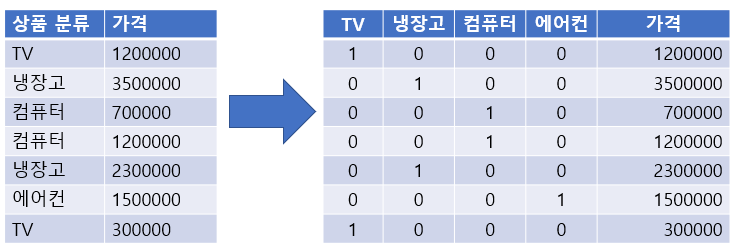

- **사이킷런**
    - sklearn.preprocessing.OneHotEncoder 이용
        - fit(): 어떻게 변환할 지 학습
        - transform(): 문자열를 숫자로 변환
        - fit_transform(): 학습과 변환을 한번에 처리
        - fit/transform/fit_transform 할 때 2차원 배열(axis=0기준 변환). 한번에 여러개 칼럼을 변환할 수 있다.
        - get_feature_names() : 원핫인코딩으로 변환된 컬럼의 이름을 반환
    - DataFrame을 넣을 경우 모든 변수들을 변환한다. 
        - 범주형 컬럼만 처리하도록 해야 한다.
- **Pandas**
    - pandas.get_dummies(DataFrame [, columns=[변환할 컬럼명]]) 함수 이용
    - DataFrame에서 범주형(`object`, `category`) 변수만 변환한다.
    
> 범주형 변수의 값을 숫자 값을 가지는 경우가 있다. (ex: 별점)    
> 이런 경우 get_dummies() columns=['컬럼명','컬럼명'] 매개변수로 컬럼들을 명시한다.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [3]:
items = np.array(['TV','냉장고','냉장고','컴퓨터','에어콘','컴퓨터','에어콘'])
print(items.shape)
print(np.unique(items))

(7,)
['TV' '냉장고' '에어콘' '컴퓨터']


In [5]:
ohe = OneHotEncoder()
ohe.fit(items)
rv = ohe.transform(items)
# ValueError: Expected 2D array, got 1D array instead:

ValueError: Expected 2D array, got 1D array instead:
array=['TV' '냉장고' '냉장고' '컴퓨터' '에어콘' '컴퓨터' '에어콘'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
# items.reshape(7,1)
# items 원본이 바뀌지 않음!!
items[..., np.newaxis]

array([['TV'],
       ['냉장고'],
       ['냉장고'],
       ['컴퓨터'],
       ['에어콘'],
       ['컴퓨터'],
       ['에어콘']], dtype='<U3')

In [9]:
src_items = items[..., np.newaxis]
ohe = OneHotEncoder()
ohe.fit(src_items)  # 어떻게 변경할지 결정(학습)
rv = ohe.transform(src_items)   # 원핫 인코딩 처리

In [13]:
type(rv)  # csr_matrix 타입의 객체로 결과를 반환 (희소행렬(sparse matrix) 객체)
rv

<7x4 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [14]:
rv.toarray()  # csr_maxtrix 변환 -> ndarray

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [15]:
ohe = OneHotEncoder(sparse=False)  # sparse=False  처리결과를 ndarray로 반환
ohe.fit(src_items)  # 어떻게 변경할지 결정(학습)
rv = ohe.transform(src_items)   # 원핫 인코딩 처리
rv

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [16]:
src_items

array([['TV'],
       ['냉장고'],
       ['냉장고'],
       ['컴퓨터'],
       ['에어콘'],
       ['컴퓨터'],
       ['에어콘']], dtype='<U3')

In [17]:
ohe.get_feature_names()

array(['x0_TV', 'x0_냉장고', 'x0_에어콘', 'x0_컴퓨터'], dtype=object)

In [ ]:
# onehot encoding한 결과를 dataframe으로 만들기

In [19]:
df = pd.DataFrame(rv, columns=ohe.get_feature_names())
df

,x0_TV,x0_냉장고,x0_에어콘,x0_컴퓨터
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.0


In [21]:
dic = {
    'Item':items,  # 범주형
    "Count":[10,10,20,15,13,3,12], # 연속형
    'Level' : [1,1,1,2,3,3,1]  # 범주형
}

df = pd.DataFrame(dic)
df

,Item,Count,Level
0,TV,10,1
1,냉장고,10,1
2,냉장고,20,1
3,컴퓨터,15,2
4,에어콘,13,3
5,컴퓨터,3,3
6,에어콘,12,1


In [22]:
print(df.values.shape)
df.values

(7, 3)


array([['TV', 10, 1],
       ['냉장고', 10, 1],
       ['냉장고', 20, 1],
       ['컴퓨터', 15, 2],
       ['에어콘', 13, 3],
       ['컴퓨터', 3, 3],
       ['에어콘', 12, 1]], dtype=object)

In [27]:
ohe2 = OneHotEncoder(sparse=False)
ohe2.fit(df) #dataframe은 2차원 배열이므로 바로 원핫인코딩 처리가 가능
rv2= ohe2.transform(df)
rv2

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.]])

In [28]:
ohe2.get_feature_names()

array(['x0_TV', 'x0_냉장고', 'x0_에어콘', 'x0_컴퓨터', 'x1_3', 'x1_10', 'x1_12',
       'x1_13', 'x1_15', 'x1_20', 'x2_1', 'x2_2', 'x2_3'], dtype=object)

In [29]:
ohe3 = OneHotEncoder(sparse=False)
ohe3.fit(df[['Item','Level']]) # 범주형 컬럼들만 추려서 변환
rv3 = ohe3.transform(df[['Item','Level']])
rv3

array([[1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0.]])

In [30]:
ohe3.get_feature_names()

array(['x0_TV', 'x0_냉장고', 'x0_에어콘', 'x0_컴퓨터', 'x1_1', 'x1_2', 'x1_3'],
      dtype=object)

In [32]:
result = np.concatenate([rv3, df['Count'].values[..., np.newaxis]], axis=1)
result

array([[ 1.,  0.,  0.,  0.,  1.,  0.,  0., 10.],
       [ 0.,  1.,  0.,  0.,  1.,  0.,  0., 10.],
       [ 0.,  1.,  0.,  0.,  1.,  0.,  0., 20.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0., 15.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  1., 13.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0.,  1.,  0.,  0., 12.]])

> sparse를 False로 주지 않으면 scipy의 csr_matrix(희소행렬 객체)로 반환.     
> 희소행렬은 대부분 0으로 구성된 행렬과 계산이나 메모리 효율을 이용해 0이 아닌 값의 index만 관리한다.   
> csr_matrix.toarray()로 ndarray로 바꿀수 있다.

In [33]:
# fit_transform
src_items

array([['TV'],
       ['냉장고'],
       ['냉장고'],
       ['컴퓨터'],
       ['에어콘'],
       ['컴퓨터'],
       ['에어콘']], dtype='<U3')

In [34]:
ohe4 = OneHotEncoder(sparse=False)
rv5 = ohe4.fit_transform(src_items) # fit과 transform의 대상이 같을 경우 fit_transform 사용
print(ohe4.get_feature_names())
rv5

['x0_TV' 'x0_냉장고' 'x0_에어콘' 'x0_컴퓨터']


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [36]:
ohe5 = OneHotEncoder(sparse=False)
rv6 = ohe5.fit_transform(df[['Item','Level']])
print(ohe5.get_feature_names())
rv6

['x0_TV' 'x0_냉장고' 'x0_에어콘' 'x0_컴퓨터' 'x1_1' 'x1_2' 'x1_3']


array([[1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0.]])

### 판다스 pd.get_dummies(df) 이용

In [37]:
df

,Item,Count,Level
0,TV,10,1
1,냉장고,10,1
2,냉장고,20,1
3,컴퓨터,15,2
4,에어콘,13,3
5,컴퓨터,3,3
6,에어콘,12,1


In [38]:
result = pd.get_dummies(df)
result

,Count,Level,Item_TV,Item_냉장고,Item_에어콘,Item_컴퓨터
0,10,1,1,0,0,0
1,10,1,0,1,0,0
2,20,1,0,1,0,0
3,15,2,0,0,0,1
4,13,3,0,0,1,0
5,3,3,0,0,0,1
6,12,1,0,0,1,0


In [46]:
df['Level2'] = ['A','A','B','B','C','B','C']
df

,Item,Count,Level,Level2
0,TV,10,1,A
1,냉장고,10,1,A
2,냉장고,20,1,B
3,컴퓨터,15,2,B
4,에어콘,13,3,C
5,컴퓨터,3,3,B
6,에어콘,12,1,C


In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item    7 non-null      object
 1   Count   7 non-null      int64 
 2   Level   7 non-null      int64 
 3   Level2  7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes
None


In [40]:
pd.get_dummies(df)  # object(문자열), categorical 타입의 컬럼만 변환 (int/float 타입은 변환이 안됨)

,Count,Level,Item_TV,Item_냉장고,Item_에어콘,Item_컴퓨터,Level2_A,Level2_B,Level2_C
0,10,1,1,0,0,0,1,0,0
1,10,1,0,1,0,0,1,0,0
2,20,1,0,1,0,0,0,1,0
3,15,2,0,0,0,1,0,1,0
4,13,3,0,0,1,0,0,0,1
5,3,3,0,0,0,1,0,1,0
6,12,1,0,0,1,0,0,0,1


In [42]:
result2 = pd.get_dummies(df,columns=['Item','Level'])  # columns 매개변수에 onehot encoding 처리할 컬럼을 명시
result2

,Count,Level2,Item_TV,Item_냉장고,Item_에어콘,Item_컴퓨터,Level_1,Level_2,Level_3
0,10,A,1,0,0,0,1,0,0
1,10,A,0,1,0,0,1,0,0
2,20,B,0,1,0,0,1,0,0
3,15,B,0,0,0,1,0,1,0
4,13,C,0,0,1,0,0,0,1
5,3,B,0,0,0,1,0,0,1
6,12,C,0,0,1,0,1,0,0


In [49]:
# fit 할때 없는 class값을 가진 데이터셋을 transform할 경우 에러발생한다.
test_items = [['TV'],['선풍기'],['에어콘'],['건조기']]
ohe6 = OneHotEncoder(sparse=False)
ohe6.fit(test_items)   # test_items에 있는 목록을 학습함

OneHotEncoder(sparse=False)

In [51]:
np.unique(src_items)

array(['TV', '냉장고', '에어콘', '컴퓨터'], dtype='<U3')

In [52]:
ohe6.transform(src_items)

ValueError: Found unknown categories ['컴퓨터', '냉장고'] in column 0 during transform

## adult dataset에 one-hot encoding 적용

In [54]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

## TODO adult 데이터셋의 범주형(categoical) 컬럼을 one hot encoding 한다.
- 범주형: 'workclass','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','native-country', 'income'
- 연속형: 'age', fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'
- **위의 컬럼들중 'age','workclass','education', 'occupation', 'gender', 'hours-per-week', 'income' 만 사용한다.**
- **income 은 Label Encoding으로 처리한다.**
    - output 데이터

In [73]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [74]:
# adult.data 읽어오기
# 결측치 처리
# 인코딩 처리
    # - age, hours-per-week(연속형)는 유지 / income : LabelEncoding / 나머지 onehot encoding
    # - pandas 이용, scikit-learn 이용
# X, y(income) 분리 

# 파일을 불러오기
data = pd.read_csv('data/adult.data',
                   header=None,  # 첫번째 행이 데이터이기 때문에 heade=None(헤더없음)으로 설정
                   names=cols,
                   na_values='?',   # 결측치 지정
                   skipinitialspace=True   # 데이터 앞뒤 공백 제거
                  )
# 결측치 제거
data.dropna(axis=0, inplace=True)
data.shape

(30162, 15)

### pandas get_dummies() 사용


In [109]:
copy_data = data.copy()
dummy_data = copy_data[['age','workclass','education', 'occupation', 'gender', 'hours-per-week', 'income']]
dummy_data.head()

,age,workclass,education,occupation,gender,hours-per-week,income
0,39,State-gov,Bachelors,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Male,13,<=50K
2,38,Private,HS-grad,Handlers-cleaners,Male,40,<=50K
3,53,Private,11th,Handlers-cleaners,Male,40,<=50K
4,28,Private,Bachelors,Prof-specialty,Female,40,<=50K


In [110]:
# onehot encoding
dummy_data = pd.get_dummies(dummy_data, columns=['workclass','education', 'occupation', 'gender'])
# X = pd.get_dummies(dummy_data, columns=['workclass','education', 'occupation', 'gender'])

# income -> label encoding
le = LabelEncoder()
dummy_data['income'] = le.fit_transform(copy_data['income'])
# y = le.fit_transform(copy_data['income'])
print(le.classes_)
#     enc_dict2[column.name] = le  # column : Series  series.name : 컬럼명

# dummy_data.info()

['<=50K' '>50K']


In [207]:
y = dummy_data['income']
# type(y)
X = dummy_data.drop(columns='income')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24129, 41) (6033, 41) (24129,) (6033,)


In [209]:
y1 = pd.Dataframe(y)
y1

AttributeError: module 'pandas' has no attribute 'Dataframe'

### sckit-learn의 OneHotEncoder 사용

In [179]:
copy_data = copy_data[['age','workclass','education', 'occupation', 'gender', 'hours-per-week', 'income']]
copy_data.head()

,age,workclass,education,occupation,gender,hours-per-week,income
0,39,State-gov,Bachelors,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Male,13,<=50K
2,38,Private,HS-grad,Handlers-cleaners,Male,40,<=50K
3,53,Private,11th,Handlers-cleaners,Male,40,<=50K
4,28,Private,Bachelors,Prof-specialty,Female,40,<=50K


In [180]:
ohe = OneHotEncoder(sparse=False)
return_value = ohe.fit_transform(copy_data[['workclass','education', 'occupation', 'gender']])

In [181]:
ohe.get_feature_names()

array(['x0_Federal-gov', 'x0_Local-gov', 'x0_Private', 'x0_Self-emp-inc',
       'x0_Self-emp-not-inc', 'x0_State-gov', 'x0_Without-pay', 'x1_10th',
       'x1_11th', 'x1_12th', 'x1_1st-4th', 'x1_5th-6th', 'x1_7th-8th',
       'x1_9th', 'x1_Assoc-acdm', 'x1_Assoc-voc', 'x1_Bachelors',
       'x1_Doctorate', 'x1_HS-grad', 'x1_Masters', 'x1_Preschool',
       'x1_Prof-school', 'x1_Some-college', 'x2_Adm-clerical',
       'x2_Armed-Forces', 'x2_Craft-repair', 'x2_Exec-managerial',
       'x2_Farming-fishing', 'x2_Handlers-cleaners',
       'x2_Machine-op-inspct', 'x2_Other-service', 'x2_Priv-house-serv',
       'x2_Prof-specialty', 'x2_Protective-serv', 'x2_Sales',
       'x2_Tech-support', 'x2_Transport-moving', 'x3_Female', 'x3_Male'],
      dtype=object)

In [182]:
return_value.shape

(30162, 39)

In [183]:
# dataframe을 ndarray로 바꿈
v = copy_data[['age','hours-per-week']].values
v.shape

(30162, 2)

In [184]:
X = np.concatenate([return_value, v], axis=1)
X.shape

(30162, 41)

In [185]:
## DataFrame으로 변환해서 합치기
v2 = copy_data[['age','hours-per-week']]
print(type(v2), type(return_value))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [186]:
r_df = pd.DataFrame(return_value, columns=ohe.get_feature_names())
r_df.shape

(30162, 39)

In [187]:
# df.join(df2) - df1,df2를 수평으로 결합 => join, index가 같은 행끼리 합친다. (기본 : left outer join)

In [188]:
X2 = v2.join(r_df)

In [189]:
# 결측치 제거로 두 데이터프레임의 인덱스가 안맞는다
# 따라서 reset_index(inplace=True)로 인덱스 재지정!!
# drop=True : 기존의 index를 컬럼으로 빼지 말고 아예 없애버림!!
v2.reset_index(drop=True, inplace=True)
print(v2.index)
print(r_df.index)

RangeIndex(start=0, stop=30162, step=1)
RangeIndex(start=0, stop=30162, step=1)


In [190]:
r_df.tail()

,x0_Federal-gov,x0_Local-gov,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay,x1_10th,x1_11th,x1_12th,...,x2_Machine-op-inspct,x2_Other-service,x2_Priv-house-serv,x2_Prof-specialty,x2_Protective-serv,x2_Sales,x2_Tech-support,x2_Transport-moving,x3_Female,x3_Male
30157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
30158,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30159,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30160,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30161,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [200]:
X = v2.join(r_df)

In [201]:
X.shape

(30162, 41)

In [202]:
X.isnull().sum()

age                     0
hours-per-week          0
x0_Federal-gov          0
x0_Local-gov            0
x0_Private              0
x0_Self-emp-inc         0
x0_Self-emp-not-inc     0
x0_State-gov            0
x0_Without-pay          0
x1_10th                 0
x1_11th                 0
x1_12th                 0
x1_1st-4th              0
x1_5th-6th              0
x1_7th-8th              0
x1_9th                  0
x1_Assoc-acdm           0
x1_Assoc-voc            0
x1_Bachelors            0
x1_Doctorate            0
x1_HS-grad              0
x1_Masters              0
x1_Preschool            0
x1_Prof-school          0
x1_Some-college         0
x2_Adm-clerical         0
x2_Armed-Forces         0
x2_Craft-repair         0
x2_Exec-managerial      0
x2_Farming-fishing      0
x2_Handlers-cleaners    0
x2_Machine-op-inspct    0
x2_Other-service        0
x2_Priv-house-serv      0
x2_Prof-specialty       0
x2_Protective-serv      0
x2_Sales                0
x2_Tech-support         0
x2_Transport

In [203]:
X.tail()

,age,hours-per-week,x0_Federal-gov,x0_Local-gov,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay,x1_10th,...,x2_Machine-op-inspct,x2_Other-service,x2_Priv-house-serv,x2_Prof-specialty,x2_Protective-serv,x2_Sales,x2_Tech-support,x2_Transport-moving,x3_Female,x3_Male
30157,27,38,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
30158,40,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30159,58,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30160,22,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30161,52,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 모델 학습

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [211]:
# train/val/test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

In [212]:
# 모델생성 
lr = LogisticRegression(max_iter=1000, random_state=0)
tree = DecisionTreeClassifier(max_depth=7, random_state=0)

# 학습
lr.fit(X_train, y_train)
tree.fit(X_train, y_train)

C:\Users\tjsdu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier(max_depth=7, random_state=0)

In [213]:
# 평가 - LogisticRegression
pred_train = lr.predict(X_train)
pred_val = lr.predict(X_val)

pred_train2 = tree.predict(X_train)
pred_val2 = tree.predict(X_val)


acc_train = accuracy_score(y_train, pred_train)
acc_val = accuracy_score(y_val, pred_val)

acc_train2 = accuracy_score(y_train, pred_train2)
acc_val2 = accuracy_score(y_val, pred_val2)

print('LogisticRegression 평가')
print('Train 정확도: {}, Validation정확도: {}'.format(acc_train, acc_val))
print('DecisionTreeClassifier 평가')
print('Train 정확도: {}, Validation정확도: {}'.format(acc_train2, acc_val2))

LogisticRegression 평가
Train 정확도: 0.8074392581464022, Validation정확도: 0.8056361375880646
DecisionTreeClassifier 평가
Train 정확도: 0.8151064601357302, Validation정확도: 0.8000414421881475


In [215]:
# 최종평가

pred_test = lr.predict(X_test)
pred_test2 = tree.predict(X_test)

acc_test = accuracy_score(y_test, pred_test)
acc_test2 = accuracy_score(y_test, pred_test2)

print(f'LogisticRegression Test 정확도:{acc_test}')
print(f'DecisionTreeClassifier Test 정확도:{acc_test2}')

LogisticRegression Test 정확도:0.810044753853804
DecisionTreeClassifier Test 정확도:0.808055693684734


# 연속형(수치형) 데이터 전처리
## Feature Scaling(정규화)
- 각 피처가 가지는 값들의 숫자 범위(Scale)가 다를 경우 이 값의 범위를 일정한 범위로 맞추는 작업
- 트리모델 계열은 안한다!
- 트리계열을 제외한 대부분의 머신러닝 알고리즘들이 피처의 스케일에 영향을 받는다.
    - 선형모델(특히!), SVM 모델, 신경망 모델 등
- **Scaling(정규화)은 train set으로 fitting 한다. test set이나 예측할 새로운 데이터는 train set으로 fitting한 것으로 변환한다.**

## 종류
- 표준화(Standardization) : 표준정규분포를 따른다
- Min Max Scaling : 최솟값이 0 최댓값이 1이 되도록 설정하는 것

## 함수
- fit(): 어떻게 변환할 지 학습
- transform(): 변환
- fit_transform(): 학습과 변환을 한번에 처리 

##  표준화(StandardScaler)
- 피쳐의 값들이 평균이 0이고 표준편차가 1인 범위(표준정규분포)에 있도록 변환한다.
    - 0을 기준으로 모든 데이터들이 모여있게 된다
- 특히 SVM이나 선형회귀, 로지스틱 회귀 알고리즘(선형모델)은 데이터셋이 표준정규분포를 따를때 성능이 좋은 모델이기 때문에 표준화를 하면 대부분의 경우 성능이 향상된다.

$$
New\,x_i = \cfrac{X_i-\mu}{\sigma}\\
\mu-평균,\;  \sigma-표준편차
$$

- sklearn.preprocessing.StandardScaler 를 이용

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [6]:
data=np.array([10,2,30]).reshape(3,1)
print(data.shape)

(3, 1)


In [7]:
sc = StandardScaler()
sc.fit(data)
rv = sc.transform(data)
rv

array([[-0.33968311],
       [-1.01904933],
       [ 1.35873244]])

In [25]:
m=np.mean([10,2,30])
std=np.std([10,2,30])
m, std

(14.0, 11.775681155103795)

In [11]:
def s_scaler(x):
    return (x-m)/std

In [12]:
s_scaler(10), s_scaler(2), s_scaler(30)

(-0.3396831102433787, -1.0190493307301363, 1.3587324409735149)

In [97]:
# iris 데이터셋으로 변환
iris = load_iris()
X, y = iris['data'], iris['target']

In [14]:
df = pd.DataFrame(X, columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [16]:
df.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [18]:
s_scaler = StandardScaler()
s_scaler.fit(df)  # pandas DataFrame도 지원
s_df = s_scaler.transform(df)  # 처리결과는 ndarray로 반환
s_df

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [20]:
s_df = pd.DataFrame(s_df, columns=iris['feature_names'])
s_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [21]:
s_df.mean()

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

In [22]:
s_df.std()

sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64

In [24]:
rv = s_scaler.fit_transform(df)
rv[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

## MinMaxScaler
- 데이터셋의 모든 값을 0과 1 사이의 값으로 변환한다.
$$
New\,x_i = \cfrac{x_i - min(X)}{max(X) - min(X)}
$$

In [27]:
data

array([[10],
       [ 2],
       [30]])

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
ms = MinMaxScaler()
ms.fit(data)
ms.transform(data)

array([[0.28571429],
       [0.        ],
       [1.        ]])

In [31]:
(10-2)/(30-2)

0.2857142857142857

In [32]:
# iris data 적용
df.min()

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

In [33]:
df.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

In [34]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(df) # 2차원 배열형태
rv = mm_scaler.transform(df)
rv[:3]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667]])

In [35]:
np.max(rv, axis=0)

array([1., 1., 1., 1.])

In [36]:
np.min(rv, axis=0)

array([0., 0., 0., 0.])

#### Feature Scaling 하는 시점
- X(input,feature)를 train,test,validation set으로 분할 한 다음에 train set으로 scaler를 이용해서 train/test/validation set을 변환
- test/validation set은 새로운 data의 역할을 하기때문에 변환은 train(학습대상)을 한정으로 fit

#### 범주형 전처리(Label, One Hot Encoding) 하는 시점
- x값 전체를 가지고 처리한 뒤에 train/test/validation으로 분할

In [37]:
X.shape

(150, 4)

In [38]:
from sklearn.model_selection import train_test_split

In [99]:
# 1. 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train)

In [100]:
# Scaling
# train으로 fit 한 뒤에 train/test/val 변환
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)  # mm_scaler : train으로 학습
X_val_scaled = mm_scaler.transform(X_val)    # val/test는 train으로 학습한 scaler를 이용해서 변환
X_test_scaled = mm_scaler.transform(X_test)

In [46]:
np.min(X_val_scaled, axis=0), np.max(X_val_scaled, axis=0)

(array([0.02941176, 0.125     , 0.05454545, 0.        ]),
 array([1.        , 0.875     , 1.01818182, 0.91666667]))

In [45]:
np.min(X_train_scaled, axis=0), np.max(X_train_scaled, axis=0)

(array([0., 0., 0., 0.]), array([1., 1., 1., 1.]))

### 위스콘신 유방암 데이터셋
- 위스콘신 대학교에서 제공한 유방암 진단결과 데이터
- ID, 암측정값들, 진단결과 컬럼들로 구성
- 사이킷런에서 제공. load_breast_cancer() 함수 이용

In [105]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [106]:
print(data['feature_names'].shape)
data['feature_names']  # 연속형

(30,)


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [107]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [77]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [78]:
data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

## TODO
- Feature scaling
    - StandardScaler
        - X_train_scaled1, X_test_scaled1, X_val_scaled1
    - MinMaxScaler
        - X_train_scaled2, X_test_scaled2, X_val_scaled2

In [103]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [108]:
X, y = data['data'], data['target']
X.shape, y.shape

((569, 30), (569,))

In [109]:
# 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

In [115]:
# StandardScaler를 이용해 Feature Scaling  (평균:0, 표준편차:1)

s_scaler = StandardScaler()
X_train_scaled1 = s_scaler.fit_transform(X_train)    # X_train을 기준으로 fit(학습)
X_test_scaled1 = s_scaler.transform(X_test)    # X_train 기준으로 변환
X_val_scaled1 = s_scaler.transform(X_val)     # X_train 기준으로 변환
X_train_scaled1[:2]

array([[ 1.48610271,  0.95313423,  1.46657299,  1.40679467,  0.33095896,
         0.52013729,  1.2334843 ,  1.34078809,  0.68530322, -0.54881769,
         0.80218227,  2.89326273,  1.33048188,  0.69869439,  1.40873164,
         0.88414313,  1.57485585,  3.76626861,  0.84413923,  1.09920724,
         0.91022144,  0.79076453,  0.99549147,  0.71322912, -0.3058515 ,
        -0.08364746,  0.52331915,  0.98924154, -0.50638514, -0.43240433],
       [-0.10875967, -0.79925932, -0.15690719, -0.20625867, -0.58081865,
        -0.69627   , -0.99296978, -0.99165801, -1.46522625, -0.60038334,
        -0.16135294, -1.30015007, -0.3119162 , -0.24277463, -0.1898749 ,
        -0.78045667, -0.86145568, -1.01811595, -0.96067181, -0.4987001 ,
        -0.20883586, -1.32320693, -0.27879324, -0.30547394, -1.08435218,
        -0.92261055, -1.13067715, -1.20579547, -1.6361161 , -0.87061524]])

In [83]:
# 확인(변환전)
np.mean(X_train,axis=0)

array([1.41734780e+01, 1.91742308e+01, 9.22871703e+01, 6.61099451e+02,
       9.63429396e-02, 1.04168407e-01, 8.86200404e-02, 4.91208324e-02,
       1.80289835e-01, 6.26715110e-02, 3.98901648e-01, 1.21274478e+00,
       2.83285275e+00, 3.98506951e+01, 7.00307143e-03, 2.53490385e-02,
       3.14135047e-02, 1.17756319e-02, 2.04724945e-02, 3.71126401e-03,
       1.63057280e+01, 2.55995879e+01, 1.07548379e+02, 8.88438462e+02,
       1.32132418e-01, 2.54790165e-01, 2.72879338e-01, 1.15178629e-01,
       2.89738462e-01, 8.38350549e-02])

In [85]:
# 확인(변환 후)
np.mean(X_train_scaled1, axis=0)

array([-2.57349087e-15, -1.32921757e-15, -6.43105837e-16,  2.44310067e-16,
       -8.97938622e-16,  4.88620133e-16,  4.11148527e-16, -5.05395481e-16,
       -1.67997484e-15,  2.69198583e-15, -3.18807862e-16,  8.82688306e-16,
       -4.05810916e-16,  6.43563347e-16,  7.83179992e-16, -3.52434809e-16,
        5.37573649e-16, -8.97824245e-16, -1.95623432e-15,  1.57078258e-16,
       -2.40116230e-16, -7.12189770e-17, -1.59483995e-15,  1.17412185e-15,
        5.79512018e-15,  1.85504847e-15,  2.56205313e-17, -3.49232243e-16,
        5.84392120e-16, -1.46769044e-15])

In [88]:
np.std(X_train, axis=0),np.std(X_test, axis=0)

(array([3.61786701e+00, 4.23420870e+00, 2.49648875e+01, 3.64588067e+02,
        1.40714138e-02, 5.31236543e-02, 7.86227756e-02, 3.95134534e-02,
        2.71561031e-02, 6.98139125e-03, 2.64027716e-01, 5.61046601e-01,
        1.91670950e+00, 4.32940427e+01, 3.00761938e-03, 1.76679103e-02,
        2.74796549e-02, 6.00975938e-03, 8.53828998e-03, 2.30050886e-03,
        4.95953160e+00, 6.12118009e+00, 3.46076504e+01, 5.95266688e+02,
        2.29929150e-02, 1.60078556e-01, 2.10236261e-01, 6.80535223e-02,
        6.34664383e-02, 1.80734890e-02]),
 array([3.19941524e+00, 4.05752124e+00, 2.21258017e+01, 3.02952735e+02,
        1.47183434e-02, 5.55731507e-02, 8.97042420e-02, 3.83177245e-02,
        2.86365433e-02, 7.35254981e-03, 2.42858594e-01, 4.94131409e-01,
        1.65323906e+00, 3.49050343e+01, 2.64911563e-03, 2.06010293e-02,
        4.30512839e-02, 6.64336224e-03, 7.92977615e-03, 3.76964957e-03,
        4.48205736e+00, 5.81876656e+00, 3.10031574e+01, 5.01391138e+02,
        2.31476823e-02

In [89]:
np.std(X_train_scaled1, axis=0), np.std(X_test_scaled1, axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0.88433744, 0.95827143, 0.88627684, 0.83094529, 1.04597474,
        1.04610933, 1.14094474, 0.96973869, 1.05451593, 1.05316398,
        0.91982235, 0.88073149, 0.86254023, 0.80623181, 0.88080149,
        1.16601392, 1.56666028, 1.10542899, 0.92873118, 1.63861554,
        0.90372594, 0.95059555, 0.89584693, 0.84229665, 1.00673109,
        1.02452928, 1.08144878, 0.91045547, 1.04668334, 1.06908734]))

In [113]:
# MinMaxScaler (0~1)

mm_scaler = MinMaxScaler()
X_train_scaled2 = mm_scaler.fit_transform(X_train)  # mm_scaler : train으로 학습
X_val_scaled2 = mm_scaler.transform(X_val)    # val/test는 train으로 학습한 scaler를 이용해서 변환
X_test_scaled2 = mm_scaler.transform(X_test)
X_train_scaled2[:2]

array([[0.60109484, 0.56016598, 0.58267377, 0.43061872, 0.53822188,
        0.34482547, 0.49440597, 0.53371668, 0.46919192, 0.18702612,
        0.20496818, 0.54716231, 0.25853686, 0.11822607, 0.32386035,
        0.2907892 , 0.24585253, 0.87624141, 0.27857826, 0.2541074 ,
        0.44375411, 0.49093817, 0.44486808, 0.27029575, 0.35613815,
        0.2351281 , 0.30583067, 0.62866001, 0.19929036, 0.1778569 ],
       [0.30863196, 0.25228216, 0.29104907, 0.17828027, 0.39546011,
        0.14661677, 0.02810336, 0.05194459, 0.17424242, 0.17944398,
        0.10051324, 0.02720562, 0.08260213, 0.04209579, 0.16041745,
        0.06990717, 0.02548058, 0.14405399, 0.06174368, 0.0793527 ,
        0.24091806, 0.14605544, 0.22068019, 0.11983922, 0.23793172,
        0.08764455, 0.02809105, 0.11408887, 0.05795387, 0.1107155 ]])

In [93]:
np.max(X_train_scaled2, axis=0), np.min(X_train_scaled2, axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [94]:
np.max(X_test_scaled2, axis=0), np.min(X_test_scaled2, axis=0)

(array([0.83932282, 0.94439834, 0.85105771, 0.6824852 , 1.23255814,
        0.8199497 , 1.13692062, 1.05175118, 0.81717172, 0.94903117,
        0.57380415, 0.60992751, 0.51936511, 0.4224857 , 0.7348472 ,
        0.78219725, 1.30348914, 1.34428317, 0.68100974, 1.37603636,
        0.72078064, 0.88992537, 0.77428702, 0.55910083, 0.78603975,
        1.13188961, 0.88258786, 1.0024113 , 0.82968658, 1.29247202]),
 array([-0.03598763,  0.10207469, -0.02971651, -0.01154209,  0.15021698,
         0.02183915,  0.        ,  0.        ,  0.0540404 ,  0.00610783,
         0.01576678,  0.00837606,  0.01278153,  0.00566121,  0.05326852,
         0.01833298,  0.        ,  0.        ,  0.0374008 ,  0.00263368,
        -0.02733718,  0.07462687, -0.02074119, -0.00952759,  0.09027273,
         0.01754868,  0.        ,  0.        ,  0.04849202,  0.00144117]))

## Modeling

In [96]:
from sklearn.svm import SVC  # 분류알고리즘, 선형회귀모델과 비슷하다, wx + b = 0(직선의 방정식 개념)
from sklearn.metrics import accuracy_score

In [110]:
# scaling 하지 않은 X_train으로 학습 및 평가
# 모델생성
svc = SVC(C=0.1, gamma=0.1, random_state=0)  # C, gamma 성능과 관련된 파라미터(hyper parameter)

# 학습
svc.fit(X_train, y_train)

# 평가
pred_train = svc.predict(X_train)
pred_val = svc.predict(X_val)
pred_test = svc.predict(X_test)

print(accuracy_score(y_train, pred_train), accuracy_score(y_val, pred_val), accuracy_score(y_test,pred_test))

0.6263736263736264 0.6263736263736264 0.631578947368421


In [116]:
# scaling 된 X_train_scale로 학습 및 평가
# Standardscaler로 전처리된 데이터셋
svc = SVC(C=0.1, gamma=0.1, random_state=0)

# 학습
svc.fit(X_train_scaled1, y_train)

# 평가
# 추론 -> 학습 데이터셋(train dataset)에 처리한 전처리를 똑같이 적용한 뒤 추론해야한다.
pred_train1 = svc.predict(X_train_scaled1)
pred_val1 = svc.predict(X_val_scaled1)
pred_test1 = svc.predict(X_test_scaled1)

print(accuracy_score(y_train,pred_train1), accuracy_score(y_val,pred_val1), accuracy_score(y_test,pred_test1))

0.9560439560439561 0.9340659340659341 0.9122807017543859


In [117]:
# scaling 된 X_train_scale로 학습 및 평가
# MinMaxScaler로 전처리된 데이터셋
svc = SVC(C=0.1, gamma=0.1, random_state=0)

# 학습
svc.fit(X_train_scaled2, y_train)

# 평가
# 추론 -> 학습 데이터셋(train dataset)에 처리한 전처리를 똑같이 적용한 뒤 추론해야한다.
pred_train2 = svc.predict(X_train_scaled2)
pred_val2 = svc.predict(X_val_scaled2)
pred_test2 = svc.predict(X_test_scaled2)

print(accuracy_score(y_train,pred_train2), accuracy_score(y_val,pred_val2), accuracy_score(y_test,pred_test2))

0.9175824175824175 0.9010989010989011 0.8859649122807017
